# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 1384 Прошичев Александр, Шушков Егор и Найдёнова Елена. Вариант №10.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

Дискретный нерекурсивный фильтр

Для заданного дискретного сигнала $x_n$ последовательность описывающая выходной сигнал нерекурсивного фильтра в общем случае выглядит следующим образом:

$y_n = \sum_{k=0}^M c_k x_{n-k}$

где M - размер окна в котором производится фильтрация.

Для сглаживания полиномом предполагается, что
$y_n = A + Bn + Cn^2 + ...$
с необходимым количеством членов. Приближение производится в смысле МНК, поэтому необходимо минимизировать следующую сумму:

$F(A,B) = \sum_{k=-m}^m (s_k - y_k)^2$

Минимизация происходит засчёт нахождения точек эсктремума по частным производным всех коэффициентов.


---



Формулы расчёта степенных сумм натуральной последовательности чисел

$ \displaystyle \sum_{k = 1}^{n}k^2 = \cfrac{n(n + 1)(2n + 1)}{6}$

$ \displaystyle \sum_{k = 1}^{n}k^4 = \cfrac{n(n + 1)(2n + 1)(3n^2 + 3n - 1)}{30}$

$ \displaystyle \sum_{k = 1}^{n}k^6 = \cfrac{n(n + 1)(2n + 1)(3 n^4 + 6 n^3 - 3n + 1)}{42}$

$ \displaystyle \sum_{k = 1}^{n}k^8 = \cfrac{n(10n^8 + 45 n^7 + 60 n^6 - 42 n^4 + 20 n^2 - 3)}{90}$



---



Передаточная функция

Для дискретного сигнала $x_n$ передаточная функция рекурсивного фильтра $y_n$ вычисляется следующим образом:

$H(\omega) = \frac{y_n}{x_n}$

В случае гармонического дискретного сигнала передаточная функция будет иметь следующий вид:

$H(\omega) = \frac{\sum_{k=0}^m c_k e^{i\omega(n-k)}}{e^{i\omega n}} = \sum_{k=0}^m c_k e^{-i\omega k}$

Связь передаточной функции для круговой частоты и циклической:

$H(f) = H(2\pi f) = H(\omega)$


## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$
. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

Подключим требуемые модули для выполнения лабораторной работы.

In [197]:
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.



---



Входной сигнал будем обозначать, как $s(t)$
Нерекурсивный фильтр, соответствующий сглаживанию прямой линией, задаётся следующей формулой:

$y(t) = A + Bt$

Приближение (в смысле МНК) прямой линией по $2h + 1$ точкам запишем, как

$ F_{2h + 1}(A, B) = \displaystyle\sum_{k=-h}^{k = h}(s_k - y_k)^2=\displaystyle\sum_{k=-h}^{k = h}(s_k - A - Bk)^2 \underset{A,B}{\Rightarrow} min$

Для минимизации данного выражения найдём точки его экстремума по коэффициентам $A, B$:

$\cfrac{\partial F_{2h+1}(A,B)}{\partial A} = \cfrac{\partial \displaystyle \sum_{k=-h}^{k = h} (s_k - A - Bk)^2}{\partial A} = \displaystyle \sum_{k=-h}^{k=h}2(s_k - A - Bk) \cdot (-1) = -2 \displaystyle \sum_{k=-h}^{k=h} s_k + 2 \displaystyle \sum_{k=-h}^{k=h}A + \displaystyle B \sum_{k=-h}^{k=h} k = -2 \displaystyle \sum_{k=-h}^{k=h} s_k + (4h + 2)A + 0B = 0$

$\cfrac{\partial F_{2h+1}(A,B)}{\partial B} = \cfrac{\partial \displaystyle \sum_{k=-h}^{k = h} (s_k - A - Bk)^2}{\partial B} = \displaystyle \sum_{k=-h}^{k=h}2(s_k - A - Bk) \cdot (-k) = -2 \displaystyle \sum_{k=-h}^{k=h} k s_k + 2A \displaystyle \sum_{k=-h}^{k=h}k + \displaystyle B \sum_{k=-h}^{k=h} k^2 = -2 \displaystyle \sum_{k=-h}^{k=h} k s_k + 0A + \cfrac{h(h + 1) (2h + 1)}{3} B = 0$

Получаем систему нормальных уравнений:

$ \begin{cases} (2h + 1) A = \displaystyle \sum_{k=-h}^{k=h} s_k \\ \cfrac{h(h + 1) (2h + 1)}{3} B = \displaystyle \sum_{k=-h}^{k=h} k s_k  \end{cases}  \Rightarrow \begin{cases} A = \cfrac{1}{(2h + 1)} \displaystyle \sum_{k=-h}^{k=h} s_k \\ B = \cfrac{3}{h(h + 1) (2h + 1)} \displaystyle \sum_{k=-h}^{k=h} k s_k  \end{cases}  $

Тогда $y_0$ можно представить, как

$ y_0 = A = \cfrac{1}{(2h + 1)} \displaystyle \sum_{k=-h}^{k=h} s_k = \cfrac{1}{(2h + 1)}(s_{-h} + s_{-(h - 1)} + ... + s_{-1} + s_{0} + s_{1} + ... + s_{(h - 1)} + s_h)$

Можно записать данное выражение в общем случае, производя сдвиг окна размером $2h + 1$ по сигналу $s(t)$. Тогда $y_n$ можно представить, как

$ y_n = \cfrac{1}{(2h + 1)} \displaystyle \sum_{k=n-h}^{k=n+h} s_k = \cfrac{1}{(2h + 1)}(s_{n-h} + s_{n-(h - 1)} + ... + s_{n-1} + s_{n} + s_{n + 1} + ... + s_{n(h - 1)} + s_{n + h})$

Рассмотрим $s_n = e^{iwn}$. Тогда $y_n$ можно записать, как

$ y_n = \cfrac{1}{(2h + 1)} \displaystyle \sum_{k=n-h}^{k=n+h} e^{iwk} = \cfrac{1}{(2h + 1)} \displaystyle \sum_{k=n-h}^{k=n+h} e^{iw(k-n)} \cdot e^{iwn} = H(w) e^{iwn}$,

где

$ H_{2h + 1}(w) = \cfrac{1}{(2h + 1)} \displaystyle \sum_{k=n-h}^{k=n+h} e^{iw(k-n)} = \cfrac{1}{(2h + 1)} \displaystyle \sum_{k=-h}^{k=h} e^{iwk}$

Заметим что данную сумму можно выразить через сумму геометрической прогрессии. Тогда $H(w)$ представим, как

$ H_{2h + 1}(w) = \cfrac{1}{(2h + 1)} \displaystyle \sum_{k=-h}^{k=h} e^{iwk} = \cfrac{1}{(2h + 1)} \cfrac{e^{-iwh} (e^{iw(2h + 1)} - 1)}{e^{iw} - 1} = \cfrac{1}{(2h + 1)} \cfrac{e^{-iw(h - \frac{1}{2})} (e^{iw(2h + 1)} - 1)}{e^{iw\frac{1}{2}} - e^{-iw\frac{1}{2}}} = \cfrac{1}{(2h + 1)} \cfrac{ (e^{iw(h + \frac{1}{2})} - e^{-iw(h + \frac{1}{2})})}{e^{iw\frac{1}{2}} - e^{-iw\frac{1}{2}}} $

Воспользуемся формулой Эйлера для перехода от экспоненциаильной форм комплексных чисел к тригонометрическим.

$ H_{2h+1}(w) = \cfrac{1}{(2h + 1)} \cfrac{ (e^{iw(h + \frac{1}{2})} - e^{-iw(h + \frac{1}{2})})}{e^{iw\frac{1}{2}} - e^{-iw\frac{1}{2}}} = \cfrac{1}{(2h + 1)} \cfrac{2i}{2i} \cfrac{\sin(w(h + \frac{1}{2}))}{\sin(w \frac{1}{2})} = \cfrac{1}{(2h + 1)}  \cfrac{\sin(w(h + \frac{1}{2}))}{\sin(w \frac{1}{2})}$

Немного преобразуем аргумент передаточной функции для удобства анализа

$ H_{2h + 1}(w) = H_{2h + 1}(2 \pi f) = \tilde{H}_{2h + 1}(f) =  \cfrac{1}{(2h + 1)}  \cfrac{\sin(2 \pi f(h + \frac{1}{2}))}{\sin(\pi f)}$

Заметим, что функция $H_{2h + 1}(w)$ является $2 \pi$-периодичной. Рассмотрим её на интревале $w \in (-\pi, \pi) \Rightarrow f \in (-0.5, 0.5)$

In [72]:
def H_1(f, h):
  return 1 / (2 * h + 1) * np.sin(2 * math.pi * f * (h + 1/2)) / np.sin(math.pi * f)

f = np.linspace(-0.5, 0.5, 100) #диапазон частот

Теперь составим формулы линейного сглаживания для разного количества точек:

1) При 3 точках (h = 1)

$ \tilde{H}_{3}(f) =  \cfrac{1}{3}  \cfrac{\sin(3 \pi f))}{\sin(\pi f)}$

2) При 5 точках (h = 2)

$ \tilde{H}_{5}(f) =  \cfrac{1}{5}  \cfrac{\sin(5 \pi f))}{\sin(\pi f)}$

3) При 7 точках (h = 3)

$ \tilde{H}_{7}(f) =  \cfrac{1}{7}  \cfrac{\sin(7 \pi f))}{\sin(\pi f)}$

4) При 9 точках (h = 4)

$ \tilde{H}_{9}(f) =  \cfrac{1}{9}  \cfrac{\sin(9 \pi f))}{\sin(\pi f)}$

Построим графики передаточных функций $\tilde{H}_{3}(f), \tilde{H}_{5}(f), \tilde{H}_{7}(f)$ и $\tilde{H}_{9}(f)$

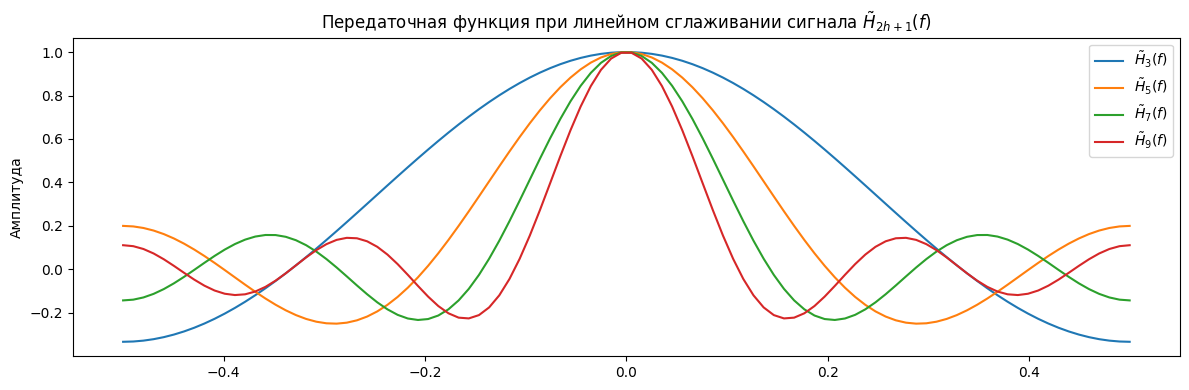

In [73]:
plt.figure(figsize=(12, 4))

for i in range(1, 5):
  plt.plot(f, H_1(f, i), label = "$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")

plt.title('Передаточная функция при линейном сглаживании сигнала $ \\tilde{H}_{2h+1}(f) $')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.legend()
plt.show()

Из графика можно выделить следующие особенности
передаточных функций при линейном сглаживании сигнала :
- Все функции имеют максимум равный 1.0 в точке f = 0
- По мере удаления от нулевой частоты амплитуда уменьшается, то есть частоты начинают подавляться
- График симметричен относительно 0.0
- При большем числе точек наблюдается более резкое подавление частот, когда при меньшем количестве точек такой эффект не так сильно выражен
- После определённой частоты каждая передаточная функция начинает колебаться

Увеличение числа точек при сглаживании приводит к более эффективной фильтрации высокочастотных компонент сигнала, но при этом усложняется частотная характеристика фильтра, а также возникают некие колебательные аномалии высоких частот


### Задание 2

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.


---



Нерекурсивный фильтр, соответствующий сглаживанию полиномом второй степени, задаётся следующей формулой:

$y(t) = A + Bt + Ct^2$

Приближение (в смысле МНК) полиномом второй степени по $2h + 1$ точкам запишем, как

$ F_{2h + 1}(A, B, C) = \displaystyle\sum_{k=-h}^{k = h}(s_k - y_k)^2=\displaystyle\sum_{k=-h}^{k = h}(s_k - A - Bk - Ck^2)^2 \underset{A,B,C}{\Rightarrow} min$

Для минимизации данного выражения найдём точки его экстремума по коэффициентам $A, B, C$:

$\cfrac{\partial F_{2h+1}(A,B, C)}{\partial A} = \cfrac{\partial \displaystyle \sum_{k=-h}^{k = h} (s_k - A - Bk - Ck^2)^2}{\partial A} = \displaystyle \sum_{k=-h}^{k=h}2(s_k - A - Bk - Ck^2) \cdot (-1) = -2 \displaystyle \sum_{k=-h}^{k=h} s_k + 2 \displaystyle \sum_{k=-h}^{k=h}A + 2 \displaystyle B \sum_{k=-h}^{k=h} k + 2 \displaystyle C \sum_{k=-h}^{k=h} k^2 = -2 \displaystyle \sum_{k=-h}^{k=h} s_k + (4h + 2)A + 0B + 2 \cdot \cfrac{h(h + 1) (2h + 1)}{3} C = 0$

$\cfrac{\partial F_{2h+1}(A,B,C)}{\partial B} = \cfrac{\partial \displaystyle \sum_{k=-h}^{k = h} (s_k - A - Bk - Ck^2)^2}{\partial B} = \displaystyle \sum_{k=-h}^{k=h}2(s_k - A - Bk - Ck^2) \cdot (-k) = -2 \displaystyle \sum_{k=-h}^{k=h} k s_k + 2A \displaystyle \sum_{k=-h}^{k=h}k + 2 \displaystyle B \sum_{k=-h}^{k=h} k^2 + 2 \displaystyle C \sum_{k=-h}^{k=h} k^3 = -2 \displaystyle \sum_{k=-h}^{k=h} k s_k + 0A + 2 \cdot \cfrac{h(h + 1) (2h + 1)}{3} B + 0C = 0$

$\cfrac{\partial F_{2h+1}(A,B,C)}{\partial C} = \cfrac{\partial \displaystyle \sum_{k=-h}^{k = h} (s_k - A - Bk - Ck^2)^2}{\partial C} = \displaystyle \sum_{k=-h}^{k=h}2(s_k - A - Bk - Ck^2) \cdot (-k^2) = -2 \displaystyle \sum_{k=-h}^{k=h} k^2 s_k + 2A \displaystyle \sum_{k=-h}^{k=h}k^2 + 2 \displaystyle B \sum_{k=-h}^{k=h} k^3 + 2 \displaystyle C \sum_{k=-h}^{k=h} k^4 = -2 \displaystyle \sum_{k=-h}^{k=h} k^2 s_k + 2 \cdot \cfrac{h(h + 1) (2h + 1)}{3} A + 0B + 2 \cdot \cfrac{h(h + 1)(2h + 1)(3h^2 + 3h - 1)}{15}C = 0$

Получаем систему нормальных уравнений:

$ \begin{cases}  (2h + 1)A + \cfrac{h(h + 1) (2h + 1)}{3} C = \displaystyle \sum_{k=-h}^{k=h} s_k \\ \cfrac{h(h + 1) (2h + 1)}{3} B = \displaystyle \sum_{k=-h}^{k=h} k s_k \\ \cfrac{h(h + 1) (2h + 1)}{3} A + \cfrac{h(h + 1)(2h + 1)(3h^2 + 3n - 1)}{15}C =  \displaystyle \sum_{k=-h}^{k=h} k^2 s_k \end{cases}  \Rightarrow  \begin{cases} \cfrac{(2h + 1) (3h^2 + 3h - 1)}{5} A + \cfrac{h(h + 1)(2h + 1)(3h^2 + 3n - 1)}{15} C = \cfrac{(3h^2 + 3h - 1)}{5} \displaystyle \sum_{k=-h}^{k=h} s_k \\ \cfrac{h(h + 1) (2h + 1)}{3} B = \displaystyle \sum_{k=-h}^{k=h} k s_k \\ \cfrac{h(h + 1) (2h + 1)}{3} A + \cfrac{h(h + 1)(2h + 1)(3h^2 + 3n - 1)}{15}C =  \displaystyle \sum_{k=-h}^{k=h} k^2 s_k \end{cases} \Rightarrow \left( \cfrac{(2h + 1) (3h^2 + 3h - 1)}{5} - \cfrac{h(h + 1) (2h + 1)}{3} \right)A = \cfrac{(3h^2 + 3h - 1)}{5} \displaystyle \sum_{k=-h}^{k=h} s_k - \displaystyle \sum_{k=-h}^{k=h} k^2 s_k $

$ A = \cfrac{5\displaystyle \sum_{k=-h}^{k=h} k^2 s_k  - (3h^2 + 3h - 1) \displaystyle \sum_{k=-h}^{k=h} s_k}{\frac{8h^3 + 12 h^2 -2h - 3}{3}} =  \cfrac{\displaystyle \sum_{k=-h}^{k=h} (5k^2 - 3h^2 - 3h + 1) s_k }{\frac{8h^3 + 12 h^2 -2h - 3}{3}}$

Тогда $y_0$ можно представить, как

$ y_0 = A = \cfrac{3}{8h^3 + 12 h^2 -2h - 3} \displaystyle \sum_{k=-h}^{k=h} (5k^2 - 3h^2 - 3h + 1) s_k $

Можно записать данное выражение в общем случае, производя сдвиг окна размером $2h + 1$ по сигналу $s(t)$. Тогда $y_n$ можно представить, как

$ y_n = A = \cfrac{3}{8h^3 + 12 h^2 -2h - 3} \displaystyle \sum_{k=n-h}^{k=n+h} (5(k - n)^2 - 3h^2 - 3h + 1) s_k$

Рассмотрим $s_n = e^{iwn}$. Тогда $y_n$ можно записать, как

$ y_n = \cfrac{3}{8h^3 + 12 h^2 -2h - 3} \displaystyle \sum_{k=n-h}^{k=n+h} (5(k - n)^2 - 3h^2 - 3h + 1) e^{iwk} = \cfrac{3}{8h^3 + 12 h^2 -2h - 3} \displaystyle \sum_{k=n-h}^{k=n+h} (5(k - n)^2 - 3h^2 - 3h + 1) \cdot e^{iw(k-n)} \cdot e^{iwn} = H(w) e^{iwn}$

где

$ H_{2h + 1}(w) =  \cfrac{3}{8h^3 + 12 h^2 -2h - 3} \displaystyle \sum_{k=n-h}^{k=n+h} (5(k - n)^2 - 3h^2 - 3h + 1) \cdot e^{iw(k-n)} = \cfrac{3}{8h^3 + 12 h^2 -2h - 3} \displaystyle \sum_{k=-h}^{k=h} (5k^2 - 3h^2 - 3h + 1) \cdot e^{iwk}$

Заметим что данную сумму можно выразить через сумму косинусов по формуле Эйлера. Тогда $H(w)$ представим, как

$ H_{2h + 1}(w) = \cfrac{3}{8h^3 + 12 h^2 -2h - 3} \left( (-3h^2 - 3h + 1) + \displaystyle \sum_{k=1}^{k=h} (5(k - n)^2 - 3h^2 - 3h + 1) (e^{iwk} - e^{-iwk}) \right) = \cfrac{3}{8h^3 + 12 h^2 -2h - 3}  \left( (-3h^2 - 3h + 1) + 2 \displaystyle \sum_{k=1}^{k=h} (5k^2 - 3h^2 - 3h + 1) \cos(wk) \right) $

Немного преобразуем аргумент передаточной функции для удобства анализа

$ H_{2h + 1}(w) = H_{2h + 1}(2 \pi f) = \tilde{H}_{2h + 1}(f) =  \cfrac{3}{8h^3 + 12 h^2 -2h - 3}  \left( (-3h^2 - 3h + 1) + 2\displaystyle \sum_{k=1}^{k=h} (5k^2 - 3h^2 - 3h + 1) \cos(2 \pi f k) \right) $

In [138]:
def H_2(f, h):
  res = -3 * h ** 2 - 3 * h + 1

  for k in range(1, h + 1):
      res = res + 2 * (5*k ** 2 - 3 * h ** 2 - 3 * h + 1) * math.cos(2 * math.pi * f * k)

  return 3 / (-8 * h ** 3 - 12 * h ** 2 + 2 * h + 3) * res



Теперь составим формулы полиномиального сглаживания для разного количества точек:

1) При 7 точках (h = 3)

$ \tilde{H}_{7}(f) = \cfrac{1}{21}  \left( -7 + 2\displaystyle \sum_{k=1}^{k=3} (k^2 - 7) \cos(2 \pi f k) \right) $

2) При 9 точках (h = 4)

$ \tilde{H}_{9}(f) = \cfrac{1}{231}  \left( -59 + 2\displaystyle \sum_{k=1}^{k=4} (5k^2 + 59) \cos(2 \pi f k) \right) $

3) При 11 точках (h = 5)

$ \tilde{H}_{11}(f) = \cfrac{1}{429}  \left( -89 + 2\displaystyle \sum_{k=1}^{k=5} (5k^2 + 89) \cos(2 \pi f k) \right) $

4) При 13 точках (h = 6)

$ \tilde{H}_{13}(f) = \cfrac{1}{143}  \left( -25 + 2\displaystyle \sum_{k=1}^{k=6} (k^2 + 25) \cos(2 \pi f k) \right) $

Построим графики передаточных функций $\tilde{H}_{7}(f), \tilde{H}_{9}(f), \tilde{H}_{11}(f)$ и $\tilde{13}_{9}(f)$

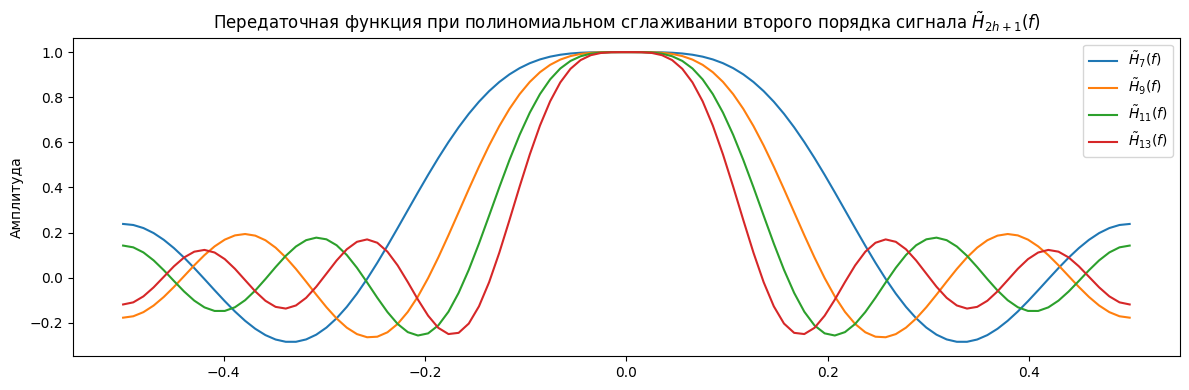

In [183]:
plt.figure(figsize=(12, 4))

for i in range(3, 7):
  plt.plot(f, [H_2(f_i, i) for f_i in f], label = "$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")

plt.title('Передаточная функция при полиномиальном сглаживании второго порядка сигнала $ \\tilde{H}_{2h+1}(f) $')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.legend()
plt.show()

Из графика можно выделить следующие особенности
передаточных функций при полиномиальном сглаживании сигнала :
- По многим свойствам он аналогичен линейному сглаживанию
- При большем числе точек наблюдается более резкое подавление частот, когда при меньшем количестве точек такой эффект не так сильно выражен
- После определённой частоты каждая передаточная функция начинает колебаться

Увеличение числа точек при сглаживании приводит к более эффективной фильтрации высокочастотных компонент сигнала, но при этом усложняется частотная характеристика фильтра, а также возникают некие колебательные аномалии высоких частот


### Задание 3

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.


---



Нерекурсивный фильтр, соответствующий сглаживанию полиномом второй степени, задаётся следующей формулой:

$y(t) = A + Bt + Ct^2 + Dt^3 + Et^4$

Приближение (в смысле МНК) полиномом четвёртой степени по $2h + 1$ точкам запишем, как

$ F_{2h + 1}(A, B, C, D, E) = \displaystyle\sum_{k=-h}^{k = h}(s_k - y_k)^2=\displaystyle\sum_{k=-h}^{k = h}(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2 \underset{A,B,C,D,E}{\Rightarrow} min$

Для минимизации данного выражения найдём точки его экстремума по коэффициентам $A, B, C, D, E$:

$\cfrac{\partial F_{2h+1}(A,B,C,D,E)}{\partial A} = \cfrac{\partial \displaystyle \sum_{k=-h}^{k = h} (s_k - A - Bk - Ck^2 - Dk^3 -Ek^4)^2}{\partial A} = \displaystyle \sum_{k=-h}^{k=h}2(s_k - A - Bk - Ck^2 - Dk^3 -Ek^4) \cdot (-1) = -2 \displaystyle \sum_{k=-h}^{k=h} s_k + 2 \displaystyle \sum_{k=-h}^{k=h}A + 2 \displaystyle B \sum_{k=-h}^{k=h} k + 2 \displaystyle C \sum_{k=-h}^{k=h} k^2 + 2 D \sum_{k=-h}^{k=h} k^3 + 2 E \sum_{k=-h}^{k=h} k^4 = -2 \displaystyle \sum_{k=-h}^{k=h} s_k + (4h + 2)A + 0B + 2 \cdot \cfrac{h(h + 1) (2h + 1)}{3} C + 0D + 2 \cfrac{h(h + 1)(2h + 1)(3h^2 + 3h - 1)}{15} E= 0$

$\cfrac{\partial F_{2h+1}(A,B,C,D,E)}{\partial B} = \cfrac{\partial \displaystyle \sum_{k=-h}^{k = h} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2}{\partial B} = \displaystyle \sum_{k=-h}^{k=h}2(s_k - A - Bk - Ck^2 - Dk^3 -Ek^4) \cdot (-k) = -2 \displaystyle \sum_{k=-h}^{k=h} k s_k + 2A \displaystyle \sum_{k=-h}^{k=h}k + 2 \displaystyle B \sum_{k=-h}^{k=h} k^2 + 2 \displaystyle C \sum_{k=-h}^{k=h} k^3 + 2 \displaystyle D \sum_{k=-h}^{k=h} k^4 + 2 \displaystyle E \sum_{k=-h}^{k=h} k^5= -2 \displaystyle \sum_{k=-h}^{k=h} k s_k + 0A + 2 \cdot \cfrac{h(h + 1) (2h + 1)}{3} B + 0C +  2 \cfrac{h(h + 1)(2h + 1)(3h^2 + 3h - 1)}{15} D + 0E = 0$

$\cfrac{\partial F_{2h+1}(A,B,C,D,E)}{\partial C} = \cfrac{\partial \displaystyle \sum_{k=-h}^{k = h} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2}{\partial C} = \displaystyle \sum_{k=-h}^{k=h}2(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) \cdot (-k^2) = -2 \displaystyle \sum_{k=-h}^{k=h} k^2 s_k + 2A \displaystyle \sum_{k=-h}^{k=h}k^2 + 2 \displaystyle B \sum_{k=-h}^{k=h} k^3 + 2 \displaystyle C \sum_{k=-h}^{k=h} k^4 + 2 \displaystyle D \sum_{k=-h}^{k=h} k^5 + 2 \displaystyle E \sum_{k=-h}^{k=h} k^6 = -2 \displaystyle \sum_{k=-h}^{k=h} k^2 s_k + 2 \cdot \cfrac{h(h + 1) (2h + 1)}{3} A + 0B + 2 \cdot \cfrac{h(h + 1)(2h + 1)(3h^2 + 3h - 1)}{15}C + 0D + 2 \cfrac{h(h + 1)(2h + 1) (3 h^4 + 6 h^3 - 3 h + 1)}{21} E  = 0$

$\cfrac{\partial F_{2h+1}(A,B,C,D,E)}{\partial D} = \cfrac{\partial \displaystyle \sum_{k=-h}^{k = h} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2}{\partial C} = \displaystyle \sum_{k=-h}^{k=h}2(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) \cdot (-k^3) = -2 \displaystyle \sum_{k=-h}^{k=h} k^3 s_k + 2A \displaystyle \sum_{k=-h}^{k=h}k^3 + 2 \displaystyle B \sum_{k=-h}^{k=h} k^4 + 2 \displaystyle C \sum_{k=-h}^{k=h} k^5 + 2 \displaystyle D \sum_{k=-h}^{k=h} k^6 + 2 \displaystyle E \sum_{k=-h}^{k=h} k^7 = -2 \displaystyle \sum_{k=-h}^{k=h} k^3 s_k + 2 \cdot 0A + 2 \cdot \cfrac{h(h + 1)(2h + 1)(3h^2 + 3h - 1)}{15} B + 0C + 2 \cfrac{h(h + 1)(2h + 1) (3 h^4 + 6 h^3 - 3 h + 1)}{21} D +  0E  = 0$

$\cfrac{\partial F_{2h+1}(A,B,C,D,E)}{\partial E} = \cfrac{\partial \displaystyle \sum_{k=-h}^{k = h} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2}{\partial C} = \displaystyle \sum_{k=-h}^{k=h}2(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) \cdot (-k^3) = -2 \displaystyle \sum_{k=-h}^{k=h} k^3 s_k + 2A \displaystyle \sum_{k=-h}^{k=h}k^3 + 2 \displaystyle B \sum_{k=-h}^{k=h} k^5 + 2 \displaystyle C \sum_{k=-h}^{k=h} k^6 + 2 \displaystyle D \sum_{k=-h}^{k=h} k^7 + 2 \displaystyle E \sum_{k=-h}^{k=h} k^8 = -2 \displaystyle \sum_{k=-h}^{k=h} k^4 s_k + 2 \cdot \cfrac{h(h + 1)(2h + 1)(3h^2 + 3h - 1)}{15} A + 0B + 2 \cfrac{h(h + 1)(2h + 1) (3 h^4 + 6 h^3 - 3 h + 1)}{21} C +  + 0D + 2  \cfrac{10 h^8 + 45 h^7 + 60 h^6 - 42 h^4 + 20 h^2 - 3}{45} E = 0$


Потребуется знать только коэффициент А, так как в прошлых пунктах было выяснено, что засчёт смещения $y_0 = A = y_n$. Составим систему нормальных уравнений с коэффициентом $A$:

$ \begin{cases} (2h + 1)A + \cfrac{h(h + 1) (2h + 1)}{3} C + \cfrac{h(h + 1)(2h + 1)(3h^2 + 3h - 1)}{15} E= \displaystyle \sum_{k=-h}^{k=h} s_k \\  \cfrac{h(h + 1) (2h + 1)}{3} A + \cfrac{h(h + 1)(2h + 1)(3h^2 + 3h - 1)}{15}C + \cfrac{h(h + 1)(2h + 1) (3 h^4 + 6 h^3 - 3 h + 1)}{21} E  = \displaystyle \sum_{k=-h}^{k=h} k^2 s_k \\ \cfrac{h(h + 1)(2h + 1)(3h^2 + 3h - 1)}{15} A +  \cfrac{h(h + 1)(2h + 1) (3 h^4 + 6 h^3 - 3 h + 1)}{21} C +  \cfrac{10 h^8 + 45 h^7 + 60 h^6 - 42 h^4 + 20 h^2 - 3}{45} E = \displaystyle \sum_{k=-h}^{k=h} k^4 s_k \end{cases} $

Если выразить из системы коэффициент A, то получим:

$ A = \cfrac{(15h^4 + 30h^3 - 35h^2 - 50h + 12) \displaystyle \sum_{k=-h}^{k=h} s_k - (70h^2 +70h - 105) \displaystyle \sum_{k=-h}^{k=h} k^2 s_k + 63 \displaystyle \sum_{k=-h}^{k=h} k^4 s_k}{\frac{128h^5 +320h^4 -320h^3 -800h^2 +72h + 180}{15}} = \cfrac{\displaystyle \sum_{k=-h}^{k=h} s_k (15h^4 + 30h^3 - 35h^2 - 50h + 12  - (70h^2 +70h - 105) k^2  + 63 k^4)}{\frac{128h^5 +320h^4 -320h^3 -800h^2 +72h + 180}{15}} $

Тогда $y_0$ можно представить, как

$ y_0 = A = \cfrac{\displaystyle \sum_{k=-h}^{k=h} s_k (15h^4 + 30h^3 - 35h^2 - 50h + 12  - (70h^2 +70h - 105) k^2  + 63 k^4)}{\frac{128h^5 +320h^4 -320h^3 -800h^2 +72h + 180}{15}} s_k$

Можно записать данное выражение в общем случае, производя сдвиг окна размером $2h + 1$ по сигналу $s(t)$. Тогда $y_n$ можно представить, как

$ y_n = A = \cfrac{15}{128h^5 +320h^4 -320h^3 -800h^2 +72h + 180} \displaystyle \sum_{k=n-h}^{k=n+h} (15h^4 + 30h^3 - 35h^2 - 50h + 12  - (70h^2 +70h - 105) k^2  + 63 k^4) \cdot s_k$

Рассмотрим $s_n = e^{iwn}$. Тогда $y_n$ можно записать, как

$ y_n = \cfrac{15}{128h^5 +320h^4 -320h^3 -800h^2 +72h + 180}\displaystyle \sum_{k=n-h}^{k=n+h} (15h^4 + 30h^3 - 35h^2 - 50h + 12  - (70h^2 +70h - 105) (k -n)^2  + 63 (k - n)^4) \cdot e^{iwk} = \cfrac{15}{128h^5 +320h^4 -320h^3 -800h^2 +72h + 180} \displaystyle \sum_{k=n-h}^{k=n+h} (15h^4 + 30h^3 - 35h^2 - 50h + 12  - (70h^2 +70h - 105) (k - n)^2  + 63 (k - n)^4) \cdot e^{iw(k-n)} \cdot e^{iwn} = H(w) e^{iwn}$

где

$ H_{2h + 1}(w) =  \cfrac{15}{128h^5 +320h^4 -320h^3 -800h^2 +72h + 180} \displaystyle \sum_{k=n-h}^{k=n+h} (15h^4 + 30h^3 - 35h^2 - 50h + 12  - (70h^2 +70h - 105) (k - n)^2  + 63 (k - n)^4) \cdot e^{iw(k-n)} = \cfrac{15}{128h^5 +320h^4 -320h^3 -800h^2 +72h + 180} \displaystyle \sum_{k=-h}^{k=h} (15h^4 + 30h^3 - 35h^2 - 50h + 12  - (70h^2 +70h - 105) k^2  + 63 k^4) \cdot e^{iwk}$

Заметим что данную сумму можно выразить через сумму косинусов по формуле Эйлера. Тогда $H(w)$ представим, как

$ H_{2h + 1}(w) = \cfrac{15}{128h^5 +320h^4 -320h^3 -800h^2 +72h + 180} \left(15h^4 + 30h^3 - 35h^2 - 50h + 12 + \displaystyle \sum_{k=1}^{k=h} (15h^4 + 30h^3 - 35h^2 - 50h + 12  - (70h^2 +70h - 105) k^2  + 63 k^4) (e^{iwk} - e^{-iwk}) \right) = \cfrac{15}{128h^5 +320h^4 -320h^3 -800h^2 +72h + 180} \left(15h^4 + 30h^3 - 35h^2 - 50h + 12 + 2\displaystyle \sum_{k=1}^{k=h} (15h^4 + 30h^3 - 35h^2 - 50h + 12  - (70h^2 +70h - 105) k^2  - 63 k^4) \cos(wk) \right) $

Немного преобразуем аргумент передаточной функции для удобства анализа

$ H_{2h + 1}(w) = H_{2h + 1}(2 \pi f) = \tilde{H}_{2h + 1}(f) =   \cfrac{15}{128h^5 +320h^4 -320h^3 -800h^2 +72h + 180} \left(15h^4 + 30h^3 - 35h^2 - 50h + 12 + 2\displaystyle \sum_{k=1}^{k=h} (15h^4 + 30h^3 - 35h^2 - 50h + 12  - (70h^2 +70h - 105) k^2  + 63 k^4) \cos(2 \pi f k) \right) $

In [167]:
def H_3(f, h):
  res = 15 * h ** 4 + 30 * h ** 3 - 35 * h ** 2 - 50 * h + 12
  for k in range(1, h + 1):
    res = res + 2 * (15 * h ** 4 + 30 * h ** 3 - 35 * h ** 2 - 50 * h + 12 - (70 * h ** 2 + 70 * h - 105) * k ** 2 + 63 * k ** 4) * math.cos(2 * math.pi * f * k)

  return 15 / (128 * h ** 5 + 320 * h ** 4 - 320 * h ** 3 - 800 * h ** 2 + 72 * h + 180) * res



Теперь составим формулы полиномиального сглаживания для разного количества точек:

1) При 9 точках (h = 4)

$ \tilde{H}_{9}(f) = \cfrac{1}{180180}  \left(5012 + \displaystyle \sum_{k=1}^{k=4} (5012 - 1295k^2 + 63k^4) \cos(2 \pi f k) \right) $

2) При 11 точках (h = 5)

$ \tilde{H}_{11}(f) = \cfrac{1}{540540} \left(12012 + \displaystyle \sum_{k=1}^{k=5} (12012 - 1995k^2 + 63k^4) \cos(2 \pi f k) \right) $

3) При 13 точках (h = 6)

$ \tilde{H}_{13}(f) = \cfrac{1}{1312740}  \left(24372 + \displaystyle \sum_{k=1}^{k=6} (24372 - 2835k^2 + 63k^4) \cos(2 \pi f k) \right) $

4) При 15 точках (h = 7)

$ \tilde{H}_{15}(f) = \cfrac{1}{2771340}  \left(44252 + \displaystyle \sum_{k=1}^{k=7} (44252 - 3815k^2 + 63k^4) \cos(2 \pi f k) \right) $

Построим графики передаточных функций $\tilde{H}_{9}(f), \tilde{H}_{11}(f), \tilde{H}_{13}(f)$ и $\tilde{H}_{15}(f)$

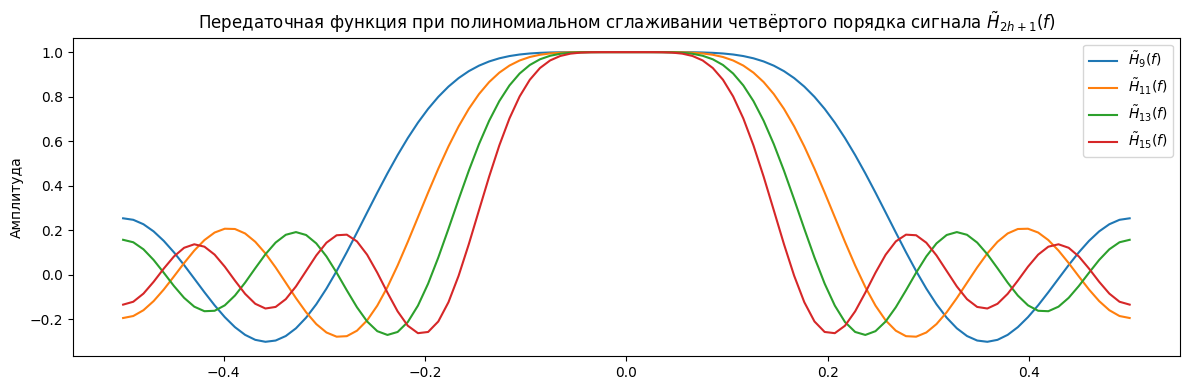

In [191]:
plt.figure(figsize=(12, 4))

for i in range(4, 8):
  plt.plot(f, [H_3(f_i, i) for f_i in f], label = "$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")

plt.title('Передаточная функция при полиномиальном сглаживании четвёртого порядка сигнала $ \\tilde{H}_{2h+1}(f) $')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.legend()
plt.show()

Передаточные функции полиномиального сглаживания сохраняют основные характеристики - количество осцилляций связано с числом точек, симметричность относительно оси частот, максимум равный 1 при f = 0.

Однако важное отличие состоит в том, что при увеличении порядка полиномиального сглаживания, функция дольше сохраняет значения близкие к 1 в окрестности нулевой частоты. Это означает лучшее сохранение чуть более высокочастотных компонент сигнала при фильтрации.


### Задание 4

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$
. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.


---



Выпишем формулы Спенсера:

Для 15-ти точек имеем:

$y_n = \frac{1}{320}(-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} - 67s_{n-1} + 74s_n + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})$

Составим передаточную функцию:

$\tilde{H}_{15}(f) = \frac{1}{320}(74 + 134\cos(2\pi f) + 92\cos(4\pi f) + 42\cos(6\pi f) + 6\cos(8\pi f) - 10\cos(10\pi f) - 12\cos(12\pi f) - 6\cos(14\pi f))$

Для 21-ой точки имеем:

$y_n = \frac{1}{350}(-s_{n-10} - 3s_{n-6} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_n + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} - 5s_{n+8} - 3s_{n+9} - s_{n+10})$

Составим передаточную функцию:


$\tilde{H}_{21}(f) = \frac{1}{350}(60 + 114\cos(2\pi f) + 94\cos(4\pi f) + 66\cos(6\pi f) + 36\cos(8\pi f) + 12\cos(10\pi f) - 4\cos(12\pi f) - 10\cos(14\pi f) - 10\cos(16\pi f) - 6\cos(18\pi f) - 2\cos(20\pi f))$



In [169]:
def H_15(f):
    return 1/320 * (74 + 134*np.cos(2*np.pi*f) + 92*np.cos(4*np.pi*f) +
                    42*np.cos(6*np.pi*f) + 6*np.cos(8*np.pi*f) -
                    10*np.cos(10*np.pi*f) - 12*np.cos(12*np.pi*f) -
                    6*np.cos(14*np.pi*f))

def H_21(f):
    return 1/350 * (60 + 114*np.cos(2*np.pi*f) + 94*np.cos(4*np.pi*f) +
                    66*np.cos(6*np.pi*f) + 36*np.cos(8*np.pi*f) +
                    12*np.cos(10*np.pi*f) - 4*np.cos(12*np.pi*f) -
                    10*np.cos(14*np.pi*f) - 10*np.cos(16*np.pi*f) -
                    6*np.cos(18*np.pi*f) - 2*np.cos(20*np.pi*f))


Построим графики передаточных функций $\tilde{H}_{15}(f), \tilde{H}_{21}(f)$

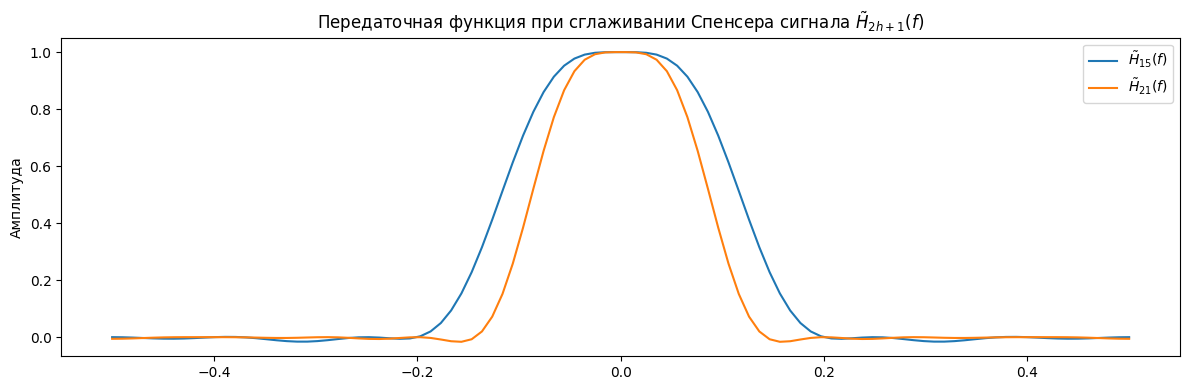

In [192]:
plt.figure(figsize=(12, 4))

plt.plot(f, [H_15(f_i) for f_i in f], label = "$ \\tilde{H}_{" + str(15) + "}(f) $")
plt.plot(f, [H_21(f_i) for f_i in f], label = "$ \\tilde{H}_{" + str(21) + "}(f) $")

plt.title('Передаточная функция при сглаживании Спенсера сигнала $ \\tilde{H}_{2h+1}(f) $')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.legend()
plt.show()

Осцилляции в области высоких частот имеют малую амплитуду (близкую к нулю), то есть происходит подавление высоких частот. Также имеется достаточно резкий спад, что также указывает, что сохраняются с основном сильно низкочастотные компоненты. Сглаживание при 21 точке проявляет более резкое подавление при повышении частоты относительно сглаживания при 15 точках.

### Задание 5

Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.


---



Построим графики в логарифмической шкале для каждого предыдущего пункта

Графики передаточных функций $\tilde{H}_{3}(f), \tilde{H}_{5}(f), \tilde{H}_{7}(f)$ и $\tilde{H}_{9}(f)$ (в Дб) для линейного сглаживания

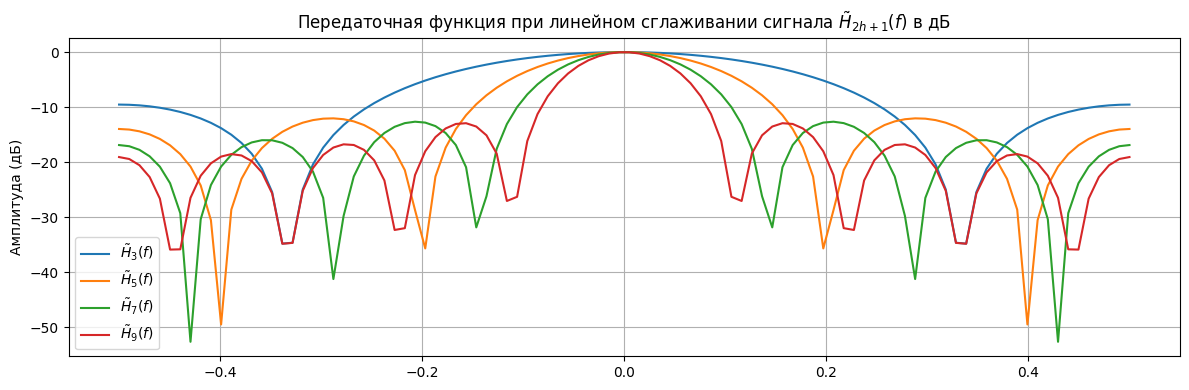

In [172]:
plt.figure(figsize=(12, 4))

for i in range(1, 5):
    H_db = 20 * np.log10([np.abs(H_1(f_i, i)) for f_i in f])
    plt.plot(f, H_db, label = "$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")

plt.title('Передаточная функция при линейном сглаживании сигнала $ \\tilde{H}_{2h+1}(f) $ в Дб')
plt.ylabel('Амплитуда (дБ)')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()


Графики передаточных функций $\tilde{H}_{7}(f), \tilde{H}_{9}(f), \tilde{H}_{11}(f)$ и $\tilde{13}_{9}(f)$ (в Дб) для сглаживания полиномом второго порядка

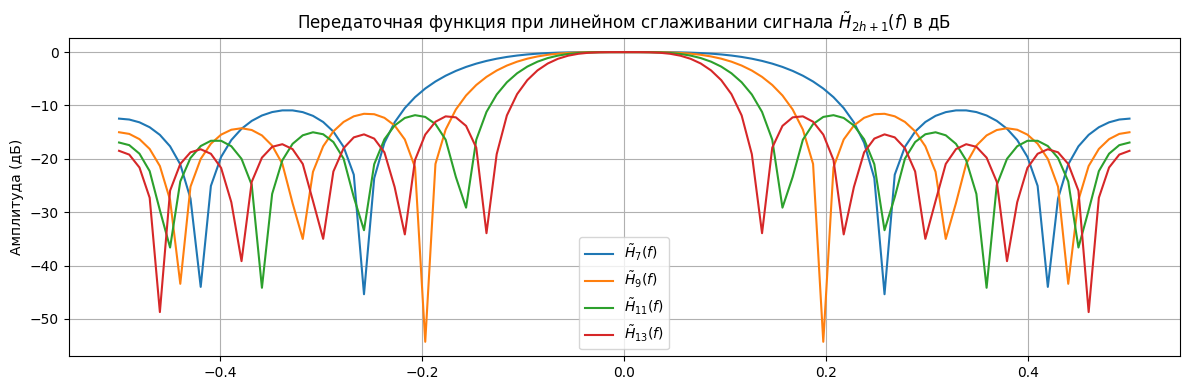

In [174]:
plt.figure(figsize=(12, 4))

for i in range(3, 7):
    H_db = 20 * np.log10([np.abs(H_2(f_i, i)) for f_i in f])
    plt.plot(f, H_db, label = "$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")

plt.title('Передаточная функция при полиномиальном сглаживании второго порядка сигнала $ \\tilde{H}_{2h+1}(f) $ в дБ')
plt.ylabel('Амплитуда (дБ)')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

Графики передаточных функций $\tilde{H}_{9}(f), \tilde{H}_{11}(f), \tilde{H}_{13}(f)$ и $\tilde{H}_{15}(f)$ (в Дб) для сглаживания полиномом 4 порядка

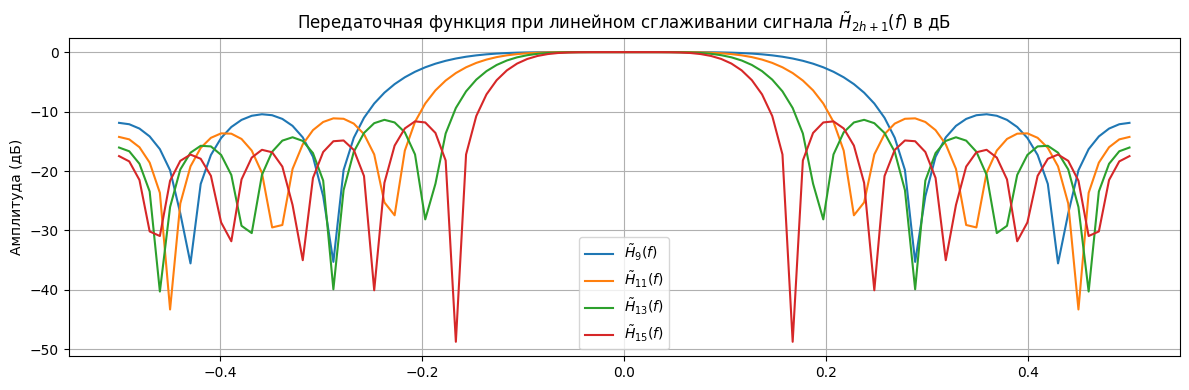

In [175]:
plt.figure(figsize=(12, 4))

for i in range(4, 8):
    H_db = 20 * np.log10([np.abs(H_3(f_i, i)) for f_i in f])
    plt.plot(f, H_db, label = "$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")

plt.title('Передаточная функция при полиномиальном сглаживании четвёртого порядка сигнала $ \\tilde{H}_{2h+1}(f) $ в дБ')
plt.ylabel('Амплитуда (дБ)')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

Графики передаточных функций $\tilde{H}_{15}(f), \tilde{H}_{21}(f)$ (в Дб) для сглаживания Спенсера

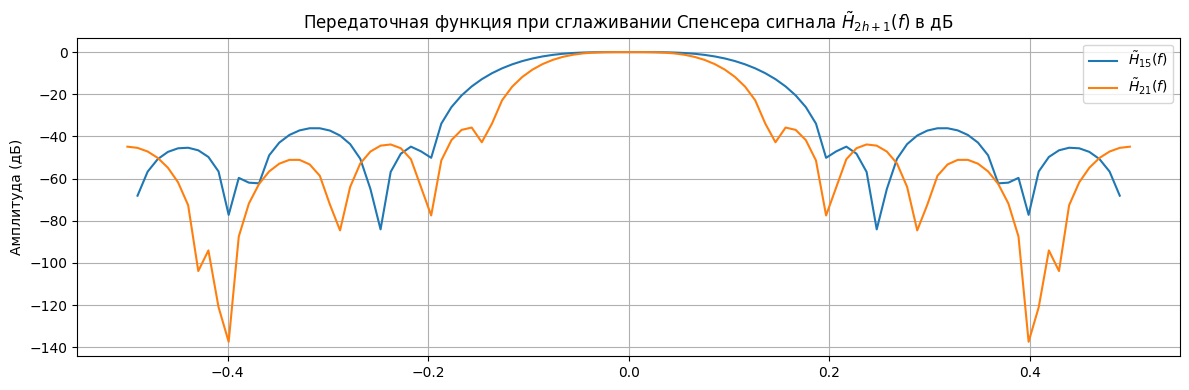

In [196]:
plt.figure(figsize=(12, 4))

plt.plot(f, 20 * np.log10([np.abs(H_15(f_i)) for f_i in f]), label = "$ \\tilde{H}_{" + str(15) + "}(f) $")
plt.plot(f, 20 * np.log10([np.abs(H_21(f_i)) for f_i in f]), label = "$ \\tilde{H}_{" + str(21) + "}(f) $")

plt.title('Передаточная функция при сглаживании Спенсера сигнала $ \\tilde{H}_{2h+1}(f) $ в дБ')
plt.ylabel('Амплитуда (дБ)')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()

Перевод передаточных функций в децибелы (логарифмическую шкалу) позволяет :

1. Лучше визуализировать поведение функций на высоких частотах, где значения становятся очень малыми в обычном масштабе, из-за чего их поведение неотличимо

2. Выделить частоты максимального подавления сигнала - они проявляются как глубокие провалы на графике

Такое представление более информативно для анализа фильтрующих свойств, особенно в области сильного подавления сигнала.


### Задание 6

Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

---



По построенным графикам можно сказать, что при полиномиальном сглаживании:
- Увеличение числа точек приводит к более резкому подавлению высоких частот
- Повышение порядка полинома расширяет область частот, где функция близка к единице

При сглаживании Спенсера же:
- После спада до нуля колебания так же имеются, но имеют очень малую амплитуду

Таким образом, формулы Спенсера обеспечивают более качественную фильтрацию высоких частот по сравнению с полиномиальным сглаживанием. Однако полиномимальное сглаживание с высоким порядком может захватывать большую окрестность около нуля, в которой искажений амплитуды не происходит.


## Выводы

В ходе данной лабораторной работы были проанализированы частотные характеристики передаточных функций для различных методов сглаживания. Рассматривались следующие методы:
- Полиномиальное сглаживание второй степени
- Полиномиальное сглаживание четвертой степени  
- Сглаживание по формулам Спенсера

Удалось выяснить, что полиномиальное сглаживание работает хорошо для низкочастотных компонент, особенно при высоких степенях полинома и небольшом количестве точек. Однако, амлитуда высокочастотных компонент резко уменьшалась, а также были замечены аномалии колебательного характера, которые достаточно сильно искажают диапазон высоких частот.
Формула Спенсера в данной ситуации является более эффективным инструментом для сглаживания. Она так же подавляет высокие частоты, но при этом аномалий колебательного характера не было обнаружено.

Крмое того, была рассмотрена логарифмическая шкала. Данный инструмент позволяет проанализировать части графика в случаях, когда это затрудительно сделать в связи с непропорциональным масштабом, когда одно или несколько больших значений сжимают информацию о более маленьких.

Таким образом, в ходе лабораторной работы удалось получить практические навыки в работе с нерекурсивными фильтрами и знания о их устройстве и механизме действия.